# Project One

Team Members:





Project Description 

# Initial Code

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests

## Get data 

In [2]:
climate_df = pd.read_csv("climate_data.csv")
energy_df = pd.read_csv("energy_data.csv")
energy_cost_df = pd.read_csv("Tariffs_n_dates.csv")
production_df = pd.read_csv("production_data.csv")

# Unpivot raw energy data.
energy_df = energy_df.melt(id_vars=['Time stamp'],
                     var_name='device',
                     value_name='energy')
energy_df = energy_df.sort_values("Time stamp")

## Merge hourly data 

In [3]:
# Energy and Cost data
hourly_data = pd.merge(energy_df, energy_cost_df, how='left',
                      on="Time stamp")
hourly_data = hourly_data[["Time stamp",  "Date", "device", "energy","Price"]]
hourly_data["Total Cost"] = (hourly_data["energy"] 
                             * hourly_data["Price"])
hourly_data = hourly_data.drop("Price", axis=1)
hourly_data = hourly_data.sort_values("Date")
hourly_data.head()

,Time stamp,Date,device,energy,Total Cost
0,01/01/2020 00:00,01/01/2020,COMP_REF1,0.0000,0.000000
195,01/01/2020 16:00,01/01/2020,COMP_REF9,1.4900,2.474294
194,01/01/2020 16:00,01/01/2020,TUNEL1,0.1372,0.227834
193,01/01/2020 16:00,01/01/2020,TUNEL3,0.2318,0.384927
192,01/01/2020 16:00,01/01/2020,COMP_REF4,0.2772,0.460318


## Daily data 

In [7]:
# Energy, Production, Climate and Cost data
daily_data = hourly_data.groupby(by=["Date","device"], as_index=False).sum()
daily_data = pd.merge(daily_data, production_df, 
                      how='left', on='Date')
daily_data = pd.merge(daily_data, climate_df, 
                      how='left', on='Date')
daily_data["Date"] = pd.to_datetime(daily_data["Date"], dayfirst=True, format="%d/%m/%Y")
daily_data.sort_values(by="Date", inplace=True)
daily_data.reset_index(drop=True, inplace=True)
daily_data.head()

,Date,device,energy,Total Cost,Product_A,Product_B,Temp,UV,PrecMM,Hum,Heat,DP,WChill,FLike
0,2019-03-01,COMP_REF1,6162.9256,8663.348872,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
1,2019-03-01,TUNEL3,5078.9900,7288.358004,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
2,2019-03-01,TUNEL2,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
3,2019-03-01,TUNEL1,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0
4,2019-03-01,COMP_REF9,0.0000,0.000000,357800.0,340036.2,20.0,6.0,0.0,33.0,20.0,1.0,20.0,20.0


# Analysis 

## What are the main climate variables that affect the factory production? 

In [87]:
# José/Jorge

In [4]:
# Graficar producto A y B VS Climate 

## What are the main climate variables that affect the energy consumption?

In [88]:
# José/Jorge

In [5]:
# Graficar devices VS climate

## How is it correlated the production and the energy consumption?

In [81]:
# Luis

In [6]:
# Graficas de scatter, correlación y regresión

## Define the energy consumption curve for each month of the year. 

In [82]:
# Luis

In [11]:

month_number=[1, 2, 3]
month_number

[1, 2, 3]

## Define the energy consumption curve for each season of the year.

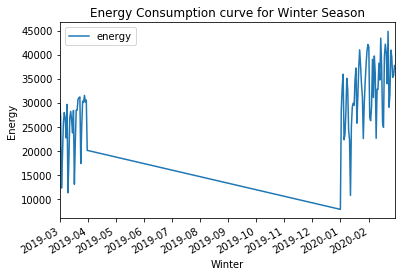

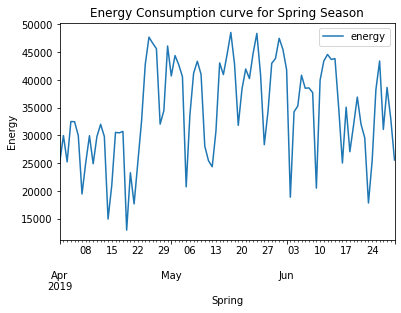

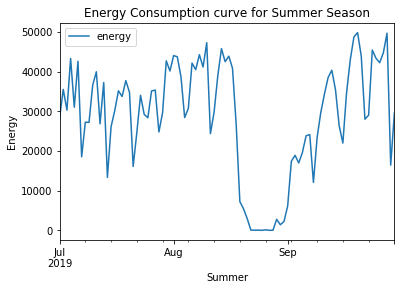

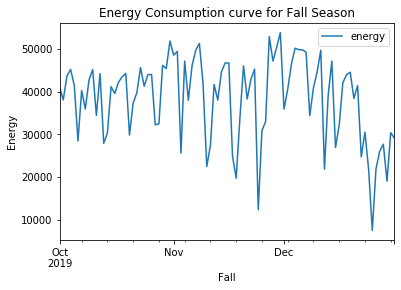

In [88]:
### Lupita

by_date= daily_data.groupby(by=["Date"], as_index=False)["energy"].sum()


winter_df = by_date[(by_date['Date'].dt.month == 1) | (by_date['Date'].dt.month == 2) | (by_date['Date'].dt.month == 3)]
spring_df = by_date[(by_date['Date'].dt.month == 4) | (by_date['Date'].dt.month == 5) | (by_date['Date'].dt.month == 6)]
summer_df = by_date[(by_date['Date'].dt.month == 7) | (by_date['Date'].dt.month == 8) | (by_date['Date'].dt.month == 9)]
fall_df = by_date[(by_date['Date'].dt.month == 10) | (by_date['Date'].dt.month == 11) | (by_date['Date'].dt.month == 12)]

#winter_df.to_csv(r'winter.csv')

#Igualar escala

winter_df.head(120)

winter_df.plot(kind = "line", x = "Date", y = "energy", 
                     title = "Energy Consumption curve for Winter Season")
plt.xlabel("Winter")
plt.ylabel("Energy")

spring_df.plot(kind = "line", x = "Date", y = "energy", 
                     title = "Energy Consumption curve for Spring Season")
plt.xlabel("Spring")
plt.ylabel("Energy")

summer_df.plot(kind = "line", x = "Date", y = "energy", 
                     title = "Energy Consumption curve for Summer Season")
plt.xlabel("Summer")
plt.ylabel("Energy")

fall_df.plot(kind = "line", x = "Date", y = "energy", 
                     title = "Energy Consumption curve for Fall Season")
plt.xlabel("Fall")
plt.ylabel("Energy")
plt.show()


## For each group of devices, rank them by cost.


In [91]:
# Lupita

by_device= daily_data.groupby(by=["device"], as_index=False)["Total Cost"].sum()
by_device= by_device.sort_values(by=["Total Cost"], ascending=False)
by_device


,device,Total Cost
3,COMP_REF2,2.491965e+06
1,COMP_REF13,1.989496e+06
6,COMP_REF7,1.958276e+06
7,COMP_REF8,1.940628e+06
0,COMP_REF1,1.811661e+06
11,TUNEL3,1.719155e+06
2,COMP_REF14,1.301846e+06
5,COMP_REF6,1.158190e+06
10,TUNEL2,1.087575e+06
4,COMP_REF4,9.547685e+05


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

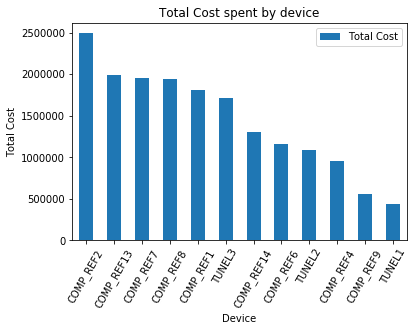

In [94]:
by_device.plot(kind = "bar", x = "device", y = "Total Cost", 
                     title = "Total Cost spent by device")
plt.xlabel("Device")
plt.ylabel("Total Cost")
plt.xticks(rotation = 60)

## Anual base line for each device.  

In [89]:
# Daniel

## Make production recommendations, based on the optimal production. 

In [86]:
# Daniel